<a href="https://colab.research.google.com/github/aliroshandel98/Pytorch/blob/main/02_NNClassification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hello everyone
My name is Ali and im gonna share another piece of my training during learning neural network and deep learning.

Im doing the course from daniel bourke and here is the link for this section:https://www.learnpytorch.io/02_pytorch_classification/

So many thanks to you for being with me.

##1.Make a binary classification dataset with Scikit-Learn's make_moons() function.
For consistency, the dataset should have 1000 samples and a random_state=42.

Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_moons
import pandas as pd

## From sklearn website we can understand that this function gets number of samples and random_state and noise and returns x, y

In [3]:
x, y = make_moons(n_samples=1000, random_state=42, noise=0.03)
x[:10], y[:10]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908],
        [ 0.57954249, -0.35297867],
        [ 0.29488426, -0.20923768],
        [-0.01448804,  0.4358961 ],
        [ 1.62651037, -0.28120742],
        [ 0.67159767,  0.78642227]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
# Turning them into tensors
x = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train), len(x_test)

(800, 200)

#2.Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [6]:
class MoonClass(nn.Module):
  def __init__(self, input, output, hidden):
    super().__init__()


    self.layers = nn.Sequential(
        nn.Linear(in_features=input, out_features=hidden),
        nn.Tanh(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.Tanh(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.Tanh(),
        nn.Linear(in_features=hidden, out_features=output)
    )
  def forward(self, x):
    return self.layers(x)

model = MoonClass(2, 1, 32)
model

MoonClass(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): Tanh()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): Tanh()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

#3.Setup a binary classification compatible loss function and optimizer to use when training the model.

In [7]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.1)

#4.Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.

Train the model for long enough for it to reach over 96% accuracy.

The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [8]:
def Accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [9]:
torch.manual_seed(42)
acc = 0
i = 0
while acc < 96:
  i += 1
  model.train()
  y_logits = model(x_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_logits = model(x_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, test_preds)
  if i % 10 == 0:
    acc = Accuracy_fn(y_train, y_preds)
    print(f"epoch: {i} | train loss: {loss} | test loss: {test_loss} | accuracy: {acc}")

epoch: 10 | train loss: 0.25615349411964417 | test loss: 0.2245098054409027 | accuracy: 82.875
epoch: 20 | train loss: 0.20628902316093445 | test loss: 0.1587403267621994 | accuracy: 88.5
epoch: 30 | train loss: 0.11581496149301529 | test loss: 0.08181886374950409 | accuracy: 96.375


#5.Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.


In [10]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

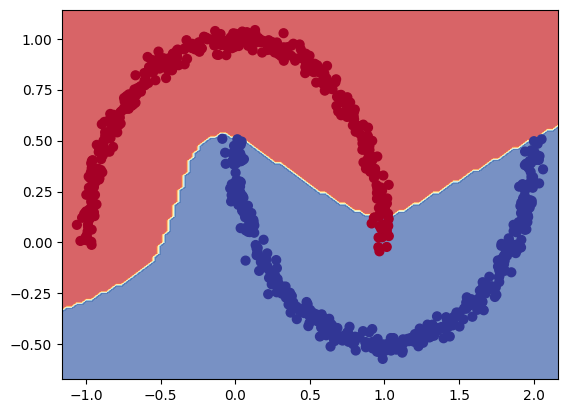

In [11]:
model.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model(x_test)))

plot_decision_boundary(model, x_train, y_train)

#6.Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

Feel free to reference the ML cheatsheet website for the formula.

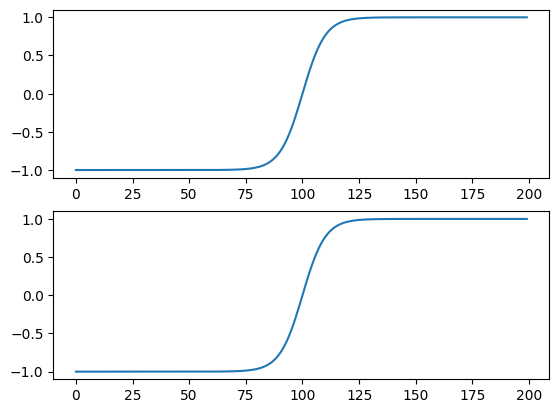

In [12]:
def TanhMe(z):
  return (torch.exp(z) - torch.exp(-z)) / (torch.exp(z) + torch.exp(-z))

A = torch.arange(-10, 10, 0.1)
plt.subplot(2, 1, 1)
plt.plot(TanhMe(A))
plt.subplot(2, 1, 2)
plt.plot(torch.tanh(A))

#7.Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).

Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).

Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).

Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

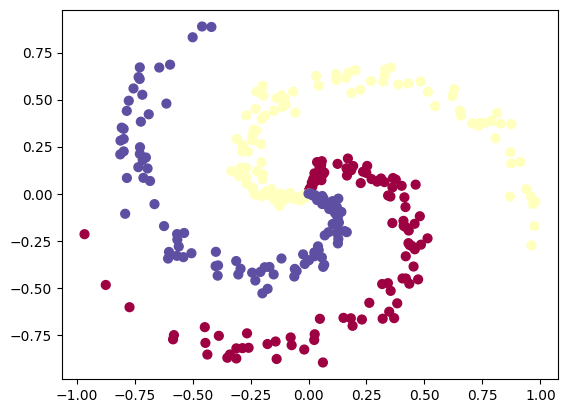

In [239]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [240]:
torch.unique(torch.from_numpy(y))

tensor([0, 1, 2], dtype=torch.uint8)

In [241]:
len(X)

300

In [242]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)
samples = int(0.8 * len(X))
x_train = X[:samples]
y_train = y[:samples]
x_test = X[samples:]
y_test = y[samples:]

In [243]:
len(y)

300

In [244]:
class Spiral(nn.Module):
  def __init__(self, input, output, hidden):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(input, hidden),
        nn.Tanh(),
        nn.Linear(hidden, hidden),
        nn.Tanh(),
        nn.Linear(hidden, hidden),
        nn.Tanh(),
        nn.Linear(hidden, hidden),
        nn.Tanh(),
        nn.Linear(hidden, hidden),
        nn.Tanh(),
        nn.Linear(hidden, hidden),
        nn.Tanh(),
        nn.Linear(hidden, output)
    )

  def forward(self, x):
    return self.layers(x)

model1 = Spiral(input=2, output=3, hidden=32)
model1

Spiral(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): Tanh()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): Tanh()
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): Tanh()
    (8): Linear(in_features=32, out_features=32, bias=True)
    (9): Tanh()
    (10): Linear(in_features=32, out_features=32, bias=True)
    (11): Tanh()
    (12): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [245]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model1.parameters(),
                             lr=0.000001)
acc = 0
i = 0
while acc < 96:
  model1.train()
  y_logits = model1(x_train).squeeze()
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model1.eval()
  with torch.inference_mode():
    test_logits = model1(x_test).squeeze()
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_test)
  i += 1
  acc = Accuracy_fn(y_train, y_preds)
  if i % 10000 == 0:
    print(f"epoch: {i} | loss: {loss} | acc: {acc}")

epoch: 10000 | loss: 1.019997477531433 | acc: 52.083333333333336
epoch: 20000 | loss: 0.8851048350334167 | acc: 60.416666666666664
epoch: 30000 | loss: 0.7590351700782776 | acc: 60.416666666666664
epoch: 40000 | loss: 0.7176206707954407 | acc: 60.83333333333333
epoch: 50000 | loss: 0.6840124726295471 | acc: 61.66666666666667
epoch: 60000 | loss: 0.6401900053024292 | acc: 65.83333333333333
epoch: 70000 | loss: 0.5839751958847046 | acc: 71.66666666666667
epoch: 80000 | loss: 0.5372228026390076 | acc: 74.16666666666667
epoch: 90000 | loss: 0.48023363947868347 | acc: 75.83333333333333
epoch: 100000 | loss: 0.4227156937122345 | acc: 78.75
epoch: 110000 | loss: 0.3604726791381836 | acc: 82.08333333333333
epoch: 120000 | loss: 0.27401453256607056 | acc: 87.91666666666667
epoch: 130000 | loss: 0.19493083655834198 | acc: 93.33333333333333
epoch: 140000 | loss: 0.13621462881565094 | acc: 95.41666666666667


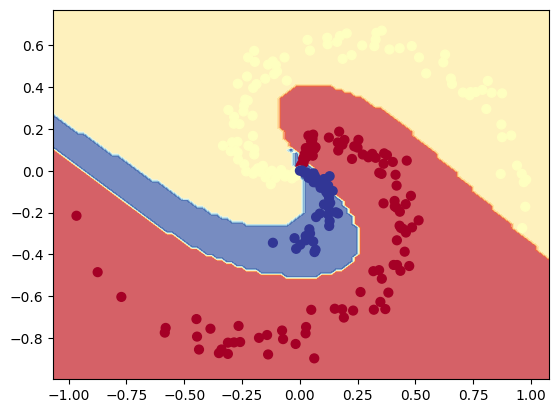

In [246]:
plot_decision_boundary(model1, x_train, y_train)

## Ok its not perfect but its the best i can do!!!
## It should be trained with different lr and layers to get resaults
## And thats it all
## Thanks you all and wish you the best